This Capstone Project involves building an Automated EDA (Exploratory Data Analysis) tool that can pre-process and visualize data based on column types using Python. The tool aims to simplify the EDA process by automating the pre-processing steps and providing a comprehensive visualization dashboard for each column type. The tool will accept data in various formats, including CSV, Excel, and SQL databases. It will pre-process the data by identifying the data types of each column and performing appropriate pre-processing steps such as handling missing values, encoding categorical features, scaling numerical features, and more. The tool will also provide options for feature selection and dimensionality reduction, making it easier to analyze large datasets. Once the pre-processing is complete, the tool will generate a comprehensive visualization dashboard for each column type, including histograms, box plots, scatter plots, and more. The tool will use Python's Matplotlib, Seaborn, and Plotly libraries to create interactive data visualizations that can be explored and customized by the user. The project will involve designing a user-friendly command-line interface for the tool, implementing data pre-processing steps, developing visualization dashboards for each column type, and testing and debugging the tool to ensure its functionality, Data: https://www.kaggle.com/datasets/parulpandey/us-international-air-traffic-data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import seaborn as sns

# read dataset

In [4]:
# raise statement is used to raise an exception manually in your code
def read_dataset(file_path, file_type):
    if file_type == 'csv':
        data = pd.read_csv(file_path)
    elif file_type == 'json':
        data = pd.read_excel(file_path)
    elif file_type == 'xlsx':
        data = pd.read_excel(file_path)
    else:
        raise ValueError(" your file does not match with file type  ")

    return data

In [5]:
data=read_dataset('International_Report_Departures.csv','csv')

In [6]:
data

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15
2,03/01/2007,2007,3,10721,BOS,13,12651,KEF,439,20402,GL,1,Departures,0,1,1
3,12/01/2004,2004,12,11259,DAL,74,16271,YYZ,936,20201,AMQ,1,Departures,0,1,1
4,05/01/2009,2009,5,13303,MIA,33,11075,CMW,219,21323,5L,0,Departures,0,20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930803,07/01/2000,2000,7,13303,MIA,33,13605,NAS,204,20398,MQ,1,Departures,1422,0,1422
930804,04/01/2019,2019,4,13303,MIA,33,14286,PTY,162,19770,CM,0,Departures,1439,0,1439
930805,08/01/2000,2000,8,13303,MIA,33,13605,NAS,204,20398,MQ,1,Departures,1441,0,1441
930806,09/01/2004,2004,9,12266,IAH,74,15632,VSA,148,19534,AM,0,Departures,1461,0,1461


# preprocess data 

In [7]:
def preprocessing_data(data):
    numeric_columns =data.drop(columns=['Year']).select_dtypes(include=['int64', 'float64']).columns
    imputer = SimpleImputer(strategy='mean')
    data[numeric_columns] = pd.DataFrame(imputer.fit_transform(data[numeric_columns]))
    scaler= StandardScaler()
    data[numeric_columns] = scaler.fit_transform(data[numeric_columns])
    categorical_columns= data.select_dtypes(include=['object']).columns
    data= pd.get_dummies(data,columns=categorical_columns, prefix=categorical_columns)
    return data


    
def handle_binary_data(data, binary_columns):
        def format_boolean(value):
            return "Yes" if value else "No"
        for column in binary_columns:
            dtype = data[column].dtype

            if dtype == bool:
                data[column] = data[column].apply(format_boolean)
            else:
                print("--------------")
    
    

In [8]:
preprocessed_data = preprocessing_data(data)

In [9]:
preprocessed_data.dtypes

Year                 int64
Month              float64
usg_apt_id         float64
usg_wac            float64
fg_apt_id          float64
                    ...   
carrier_ZUQ          uint8
carrier_ZV           uint8
carrier_ZW           uint8
carrier_ZX           uint8
type_Departures      uint8
Length: 3800, dtype: object

In [10]:
preprocessed_data.head()

,Year,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,carriergroup,Scheduled,Charter,...,carrier_ZL,carrier_ZN,carrier_ZP,carrier_ZQ,carrier_ZS,carrier_ZUQ,carrier_ZV,carrier_ZW,carrier_ZX,type_Departures
0,2006,-0.407593,-0.292124,-1.360535,-0.166965,1.309312,0.250031,0.817584,-0.656339,0.965708,...,0,0,0,0,0,0,0,0,0,1
1,2003,-0.407593,-0.924252,-1.505613,0.192137,0.934320,-0.104823,0.817584,-0.656339,1.569690,...,0,0,0,0,0,0,0,0,0,1
2,2007,-0.983784,-0.768889,-1.070378,-0.431375,-0.096909,0.719689,0.817584,-0.656339,-0.121459,...,0,0,0,0,0,0,0,0,0,1
3,2004,1.609077,-0.570820,1.142066,1.441749,1.628750,0.300128,0.817584,-0.656339,-0.121459,...,0,0,0,0,0,0,0,0,0,1
4,2009,-0.407593,0.181696,-0.344987,-1.246857,-0.860783,2.642159,-1.223116,-0.656339,2.173671,...,0,0,0,0,0,0,0,0,0,1


In [11]:
preprocessed_data['carrier_ZUQ'].isnull().sum()

0

In [12]:
#function to create histogram and take name of column from user 

In [13]:
def create_histogram(ax,data,col):
    sns.histplot(data[col], bins=25,ax=ax,color='lime')
    ax.set_title(f'Histogram of {col}')
    plt.tight_layout()
    plt.show()

Enter the name of the column for the histogram: Year


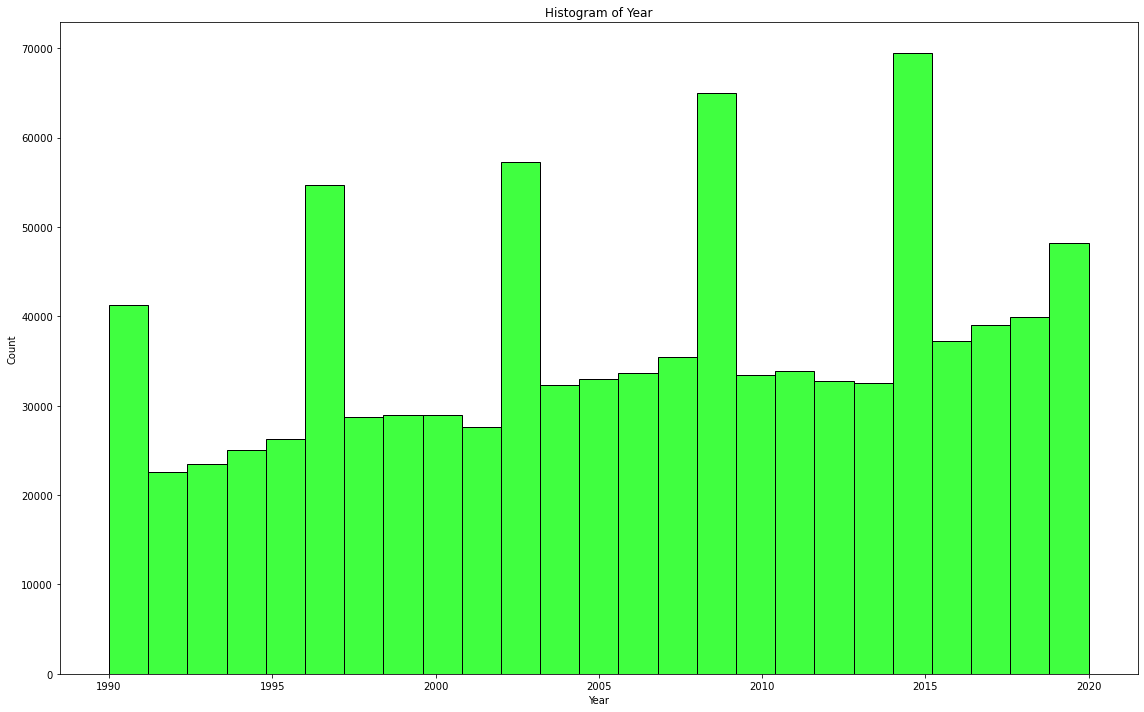

In [14]:
column_name = input("Enter the name of the column for the histogram: ")
fig,ax_hist = plt.subplots(figsize=(16,10))
create_histogram(ax_hist,preprocessed_data,column_name)

In [ ]:
#function to create bar_plot and take name of column from user 

In [16]:
def create_bar_plot(data,col):
    plt.figure(figsize=(22,15))
    sns.countplot(data=data, x=col,edgecolor='#FF8C00',color='#FF7F50')
    plt.title(f'Bar Plot of {col}')
    plt.show()

Enter the name of the column for the bar chart: carriergroup


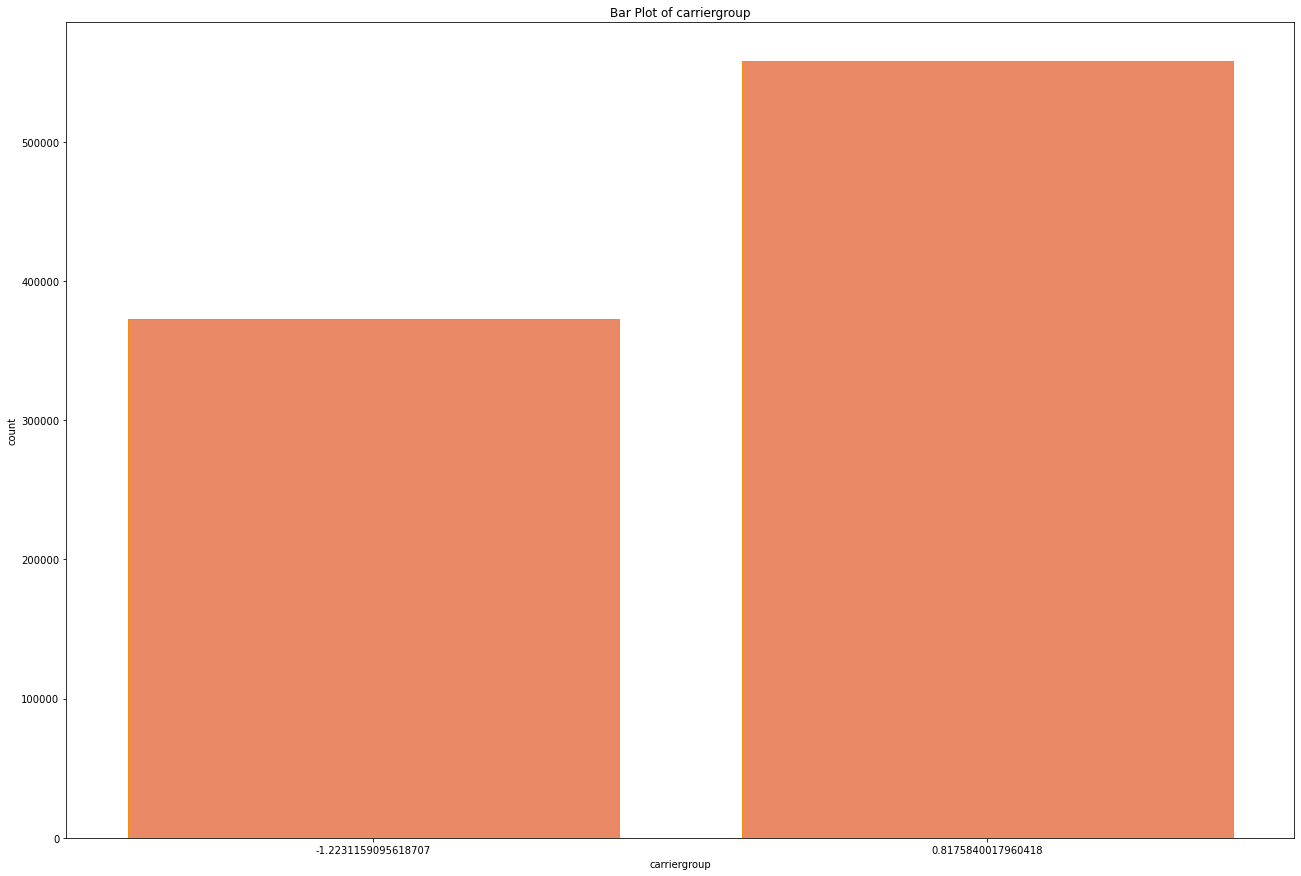

In [18]:
column_name = input("Enter the name of the column for the bar chart: ")
create_bar_plot(preprocessed_data,column_name)

In [19]:
#function to create_box_plot and take name of column from user 

In [20]:
def create_box_plot(ax, data,col):
    sns.boxplot(x=data[col], ax=ax,color='#FF8C00')
    ax.set_title(f'Box Plot of {col}')
    plt.tight_layout()
    plt.show()

Enter the name of the column for the bar chart: Year


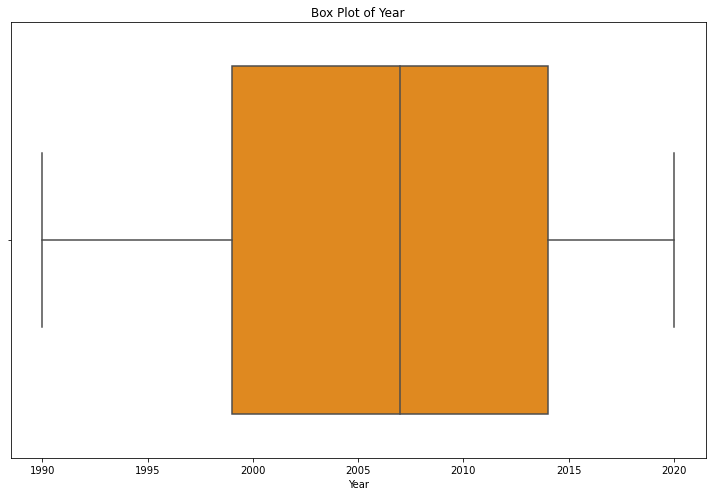

In [21]:
column_name = input("Enter the name of the column for the bar chart: ")
fig,ax_box = plt.subplots(figsize=(10,7))
create_box_plot(ax_box,preprocessed_data,column_name)

In [22]:
#function to create__pie_plot and take name of column from user 

In [24]:
def create_pie_plot(data,col):
    feature_counts = data[col].value_counts()
    plt.figure(figsize=(22,15))
    plt.pie(feature_counts, labels=feature_counts.index,shadow=True)
    plt.axis('equal')
    plt.title(f'Pie Plot of {col}')
    plt.show()

Enter the name of the column for the bar chart: Month


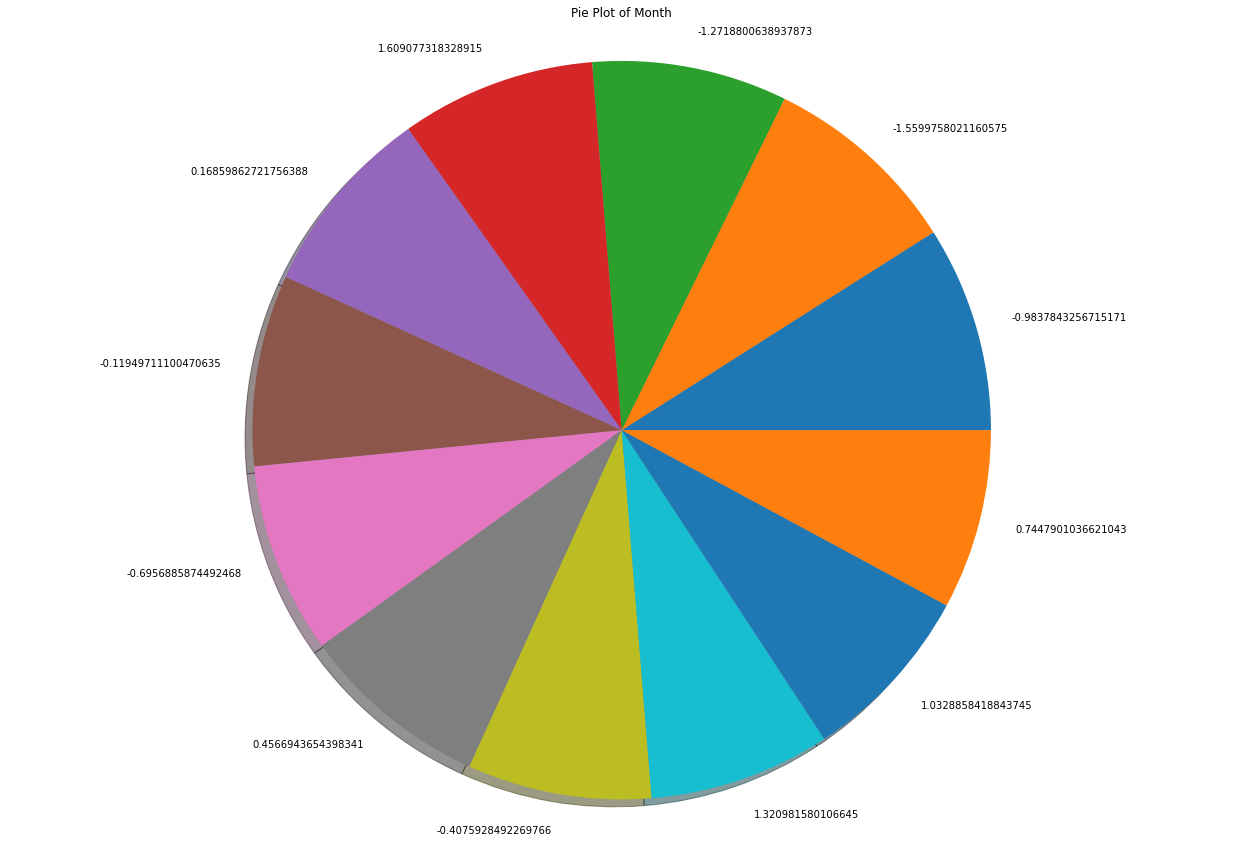

In [25]:
column_name = input("Enter the name of the column for the bar chart: ")
create_pie_plot(preprocessed_data,column_name)